# Deflection of a tube

## Description

We consider the deflection of a tube under a vertical stress.

<img src="simply_supported_beam.png" width="300" />

The parameters of the model are:
* F : the strength,
* L : the length of the tube,
* a : position of the force,
* D : external diameter of the tube,
* d : internal diameter of the tube,
* E : Young modulus.

The following figure presents the internal and external diameter of the tube:

<img src="tube-diameters.png" width="200" />

The area moment of inertia of the cross section about the neutral axis of a round tube (i.e. perpendicular to the section) with external and internal diameters $D$ and $d$ are:
$$
I = \frac{\pi (D^4-d^4)}{32}.
$$
Note: this equation can be written in terms of the external $R=D/2$ and internal radius $r=d/2$ as:
$$
I = \frac{\pi (R^4-r^4)}{2}.
$$

The vertical deviation $y$ of the beam at point $x$ is governed by the following differential equation (Statics and Mechanics of Materials, page 606):
$$
\frac{d^2y}{dx^2} = \frac{M(x)}{EI},
$$
where $M(x)$ is the bending moment. 
Setting the boundary conditions and integrating twice leads to (Shigley's Mechanical Engineering Design, table A-9, page 1015):
$$
y(x) = -\frac{Fbx}{6LEI} (L^2 - b^2 - x^2)
$$
for any $x\in[0,a]$. 
At the point $x=a$, the deflection is 
$$
y(a) = -\frac{Fba}{6LEI} (L^2 - b^2 - a^2).
$$
However, the equation $L=a+b$ implies: 
$$
L^2 = (a+b)^2 = a^2 + 2ab + b^2
$$
which leads to:
$$
L^2-b^2-a^2 = 2ab.
$$
Plugging this equation into $y(a)$, we get:
$$
y(a) = -\frac{Fba}{6LEI} 2ab = = -\frac{Fb^2a^2}{3LEI}.
$$
We finally use the equation $b = L-a$. 

The vertical deflection is :
$$
g(X) = 
- F \frac{a^2 (L-a)^2}{3 E L I},
$$
where $X=(F,L,a,D,d,E)$.

The following table presents the distributions of the random variables. These variables are assumed to be independent.

|Variable|Distribution|
|--|--|
|F|Normal(1,0.1)|
|L|Normal(1.5,0.01)|
|a|Uniform(0.7,1.2)|
|D|Triangular(0.75,0.8,0.85)|
|d|Triangular(0.09,0.1,0.11)|
|E|Normal(200000,2000)|


## References

* Deflection of beams by Russ Elliott. http://www.clag.org.uk/beam.html
* https://upload.wikimedia.org/wikipedia/commons/f/ff/Simple_beam_with_offset_load.svg
* https://en.wikipedia.org/wiki/Deflection_(engineering)
* https://mechanicalc.com/reference/beam-deflection-tables
* Shigley's Mechanical Engineering Design (9th Edition), Richard G. Budynas, J. Keith Nisbettn, McGraw Hill (2011)
* Mechanics of Materials (7th Edition), James M. Gere, Barry J. Goodno, Cengage Learning (2009)
* Statics and Mechanics of Materials (5th Edition), Ferdinand Beer, E. Russell Johnston, Jr., John DeWolf, David Mazurek. Mc Graw Hill (2011) Chapter 15: deflection of beams.

In [1]:
import openturns as ot

We use the variable names `De` for the external diameter and `di` for the internal diameter because the symbolic function engine is not case sensitive, hence the variable names `D` and `d` would not be distiguished.

In [2]:
inputsvars=["F","L","a","De","di","E"]
formula = ["-F*a^2*(L-a)^2/(3*E*L*pi_*(De^4-di^4)/32)"]
g = ot.SymbolicFunction(inputsvars,formula)

In [3]:
XF=ot.Normal(1,0.1)
XL=ot.Normal(1.5,0.01)
Xa=ot.Uniform(0.7,1.2)
XD=ot.Triangular(0.75,0.8,0.85)
Xd=ot.Triangular(0.09,0.1,0.11)
XE=ot.Normal(200000,2000)
XF.setDescription(["Force"])
XL.setDescription(["Longueur"])
Xa.setDescription(["Location"])
XD.setDescription(["External diameter"])
Xd.setDescription(["Internal diameter"])
XE.setDescription(["Young Modulus"])

In [4]:
inputDistribution = ot.ComposedDistribution([XF,XL,Xa,XD,Xd,XE])

In [5]:
n = 500
inputSample = inputDistribution.getSample(n)

In [6]:
outputSample = g(inputSample)

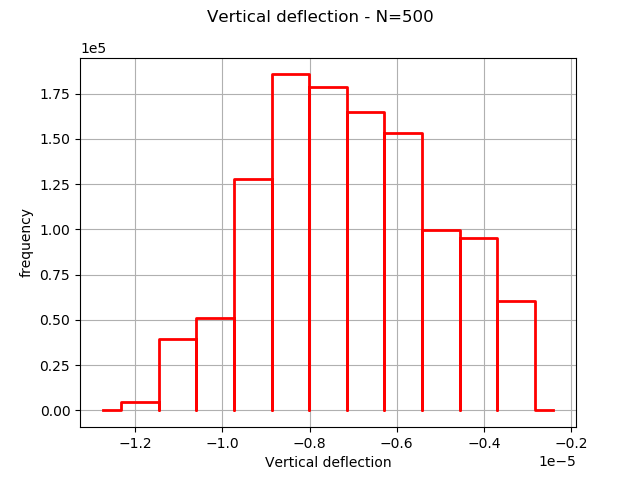

In [7]:
graph = ot.VisualTest.DrawHistogram(outputSample)
graph.setTitle("Vertical deflection - N=%d" % (n))
graph.setXTitle("Vertical deflection")
graph.setLegends([""])
graph